In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

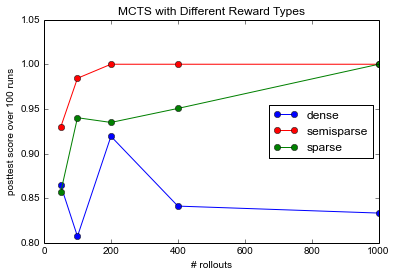

In [8]:
figure()
title('MCTS with Different Reward Types')
xlabel('# rollouts')
ylabel('posttest score over 100 runs')

xs = np.array([50,100,200,400,1000])
densey = np.array([0.8645,0.8072,0.91927,0.8411,0.8333])
semisparsey = np.array([0.9296,0.9843,1,1,1])
sparsey = np.array([0.8567,0.9401,0.9348,0.9505,1])

plot(xs, densey, 'o-', color='blue', label='dense')
plot(xs, semisparsey, 'o-', color='red', label='semisparse')
plot(xs, sparsey, 'o-', color='green', label='sparse')

legend(loc='center right')


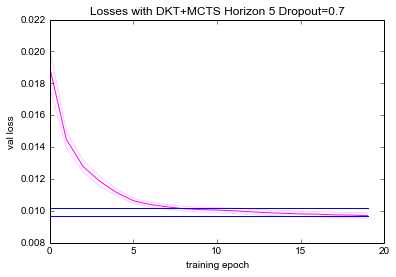

In [5]:
figure()
title('Losses with DKT+MCTS Horizon 5 Dropout=0.7')
xlabel('training epoch')
ylabel('val loss')

data = np.load('experiments/dropoutput1.npz')

vals = data['vals'][0,:,:]

sliceend = 20

xs = np.array(range(20))[:sliceend]

ys_val = np.mean(vals,axis=0)[:sliceend]
err_val = np.std(vals, axis=0)[:sliceend]*1.96/np.sqrt(10)


plot(xs, ys_val, color='#ff00ff')
plot(xs, ys_val+err_val, color='#ffccff')
plot(xs, ys_val-err_val, color='#ffccff')

plot(xs, np.repeat(0.0097,xs.shape),color='blue')
plot(xs, np.repeat(0.0097+(0.019-0.0097)*0.05 ,xs.shape),color='blue')
# with 0.05 threshold, looks like epoch 9

[[ 0.75        0.65885417  0.75        0.75        0.75        0.72135417
   0.5390625   0.67708333  0.50260417  0.56510417  0.63541667  0.64322917
   0.53125     0.51302083  0.5390625 ]
 [ 0.75        0.75        0.75        0.75        0.75        0.75        0.75
   0.75        0.75        0.75        0.75        0.70833333  0.6328125
   0.70572917  0.65625   ]
 [ 0.75        0.75        0.75        0.75        0.578125    0.29427083
   0.49479167  0.48958333  0.50260417  0.51822917  0.54947917  0.61979167
   0.74479167  0.58333333  0.75      ]
 [ 0.74739583  0.75        0.75        0.75        0.7265625   0.63020833
   0.5078125   0.51822917  0.51822917  0.49739583  0.5078125   0.55729167
   0.46614583  0.49739583  0.59895833]
 [ 0.75        0.5         0.5         0.65885417  0.54166667  0.50260417
   0.5         0.5         0.69791667  0.75        0.75        0.75        0.75
   0.55989583  0.5       ]
 [ 0.75        0.75        0.75        0.75        0.87760417  0.9296875
   0.

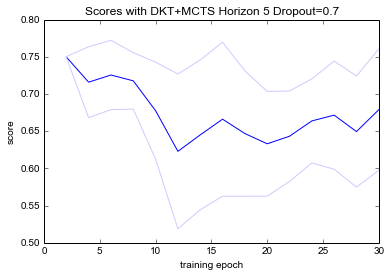

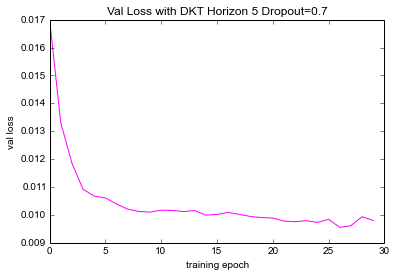

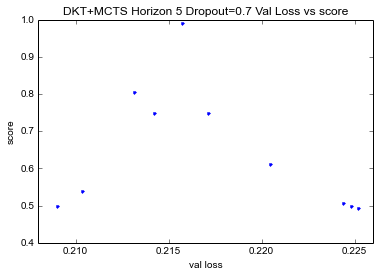

In [9]:
figure()
title('Scores with DKT+MCTS Horizon 5 Dropout=0.7')
xlabel('training epoch')
ylabel('score')

data = np.load('experiments/earlystopping4.npz')

print(data['scores'][:,:])

xs = data['eps'][0,:]
ys = np.mean(data['scores'], axis=0)
err = np.std(data['scores'], axis=0)*1.96/np.sqrt(data['scores'].shape[0])

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

figure()
title('Val Loss with DKT Horizon 5 Dropout=0.7')
xlabel('training epoch')
ylabel('val loss')

ys = np.mean(data['vals'][5:6,:], axis=0)
plot(range(ys.shape[0]), ys, color='#ff00ff')

figure()
title('DKT+MCTS Horizon 5 Dropout=0.7 Val Loss vs score')
xlabel('val loss')
ylabel('score')

xs = np.sum(data['vals'][:,:20], axis=1)
ys = data['scores'][:,6]
plot(xs, ys, '.')

[[ 0.61458333  0.5         0.72135417  0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5
   0.515625    0.5       ]
 [ 0.51822917  0.69791667  0.7109375   0.62760417  0.73958333  0.71614583
   0.73177083  0.75        0.75        0.75        0.75        0.75        0.75
   0.75        0.75      ]
 [ 0.5         0.73958333  0.75        0.72916667  0.74479167  0.75        0.75
   0.75        0.65104167  0.63802083  0.6484375   0.67447917  0.69010417
   0.70052083  0.69791667]
 [ 0.51302083  0.65364583  0.53125     0.76302083  0.77864583  0.62239583
   0.75        0.75        0.75        0.75        0.75        0.75
   0.80208333  0.84895833  0.91666667]
 [ 0.51302083  0.5859375   0.74739583  0.73177083  0.97916667  0.75
   0.7578125   0.7578125   0.76302083  0.7890625   0.7734375   0.8046875
   0.8203125   0.78385417  0.77083333]
 [ 0.5         0.5         0.75520833  0.75        0.70833333  0.73697917
   0.73177083  0.75        0.7

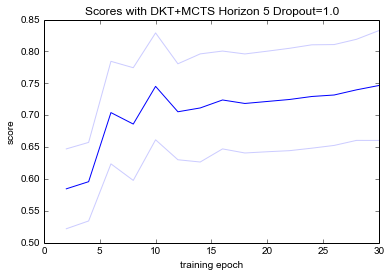

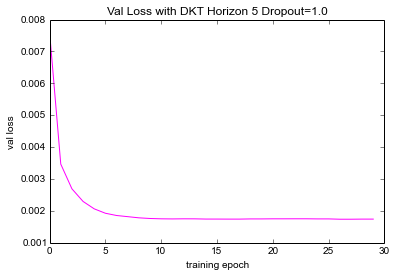

In [23]:
figure()
title('Scores with DKT+MCTS Horizon 5 Dropout=1.0')
xlabel('training epoch')
ylabel('score')

data = np.load('experiments/earlystopping5.npz')

print(data['scores'])

xs = data['eps'][0,:]
ys = np.mean(data['scores'], axis=0)
err = np.std(data['scores'], axis=0)*1.96/np.sqrt(data['scores'].shape[0])

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

figure()
title('Val Loss with DKT Horizon 5 Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

ys = np.mean(data['vals'][:,:], axis=0)
plot(range(ys.shape[0]), ys, color='#ff00ff')
#plot(range(ys.shape[0]), data['vals'][8,:], color='#0000ff')

#figure()
#title('Val Loss vs score')
#xlabel('val loss')
#ylabel('score')

#xs = data['vals'][:,-3]
#ys = data['scores'][:,-2]
#plot(xs, ys, '.')

 0 [0.5000 0.7500 0.7500 0.7500 0.7500 0.7500 0.7474 0.7448]
 1 [0.7500 1.0000 0.7656 0.7500 0.7500 0.7526 0.7500 0.7500]
 2 [0.7188 0.5312 0.6901 0.6068 0.5391 0.5885 0.6120 0.6536]
 3 [0.7031 0.5000 0.2995 0.5521 0.9089 1.0000 1.0000 0.9792]
 4 [0.7318 0.6927 0.7500 0.5573 0.6068 0.6120 0.5365 0.5208]
 5 [0.4193 0.3125 0.4479 0.5130 0.9010 1.0000 0.7500 0.7500]
 6 [0.7500 0.5000 0.5078 0.6042 0.6458 0.6745 0.6146 0.6589]
 7 [0.5391 0.7500 0.7682 0.7552 0.7708 1.0000 0.9922 0.7500]
 8 [0.4505 0.6953 0.7500 0.9010 0.7578 0.7682 0.7839 0.8177]
 9 [0.7500 0.5938 0.6042 0.9271 0.6979 0.5599 0.5729 0.6068]
10 [0.6589 0.7188 0.9688 0.5781 0.5000 0.5078 0.6406 0.6458]
11 [0.7344 0.5807 0.7370 0.6354 0.6328 0.5156 0.7396 0.7500]
12 [0.6615 0.7474 1.0000 1.0000 0.5026 0.5000 0.5000 0.5000]
13 [0.5208 0.5547 0.7005 0.7031 0.7396 0.6641 0.6172 0.6198]
14 [0.5000 0.6354 0.6953 0.6484 0.9870 0.7500 0.7500 0.7500]
15 [0.7292 0.5000 0.5026 0.5078 0.5078 0.5104 0.5078 0.5130]
16 [0.6536 0.7161 0.6328

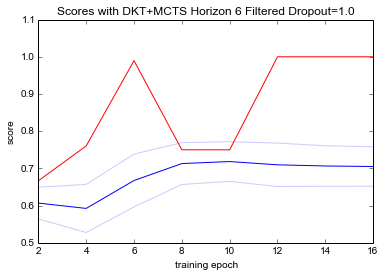

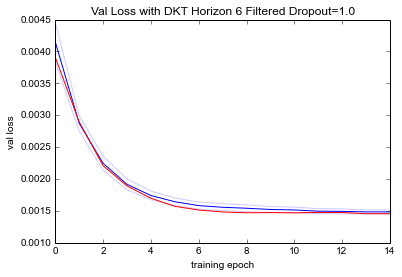

In [37]:
figure()
title('Scores with DKT+MCTS Horizon 6 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('score')

data1 = np.load('experiments/earlystopping6.npz')
data2 = np.load('experiments/earlystopping7.npz')

scores = np.vstack([data1['scores'], data2['scores']])
vals = np.vstack([data1['vals'], data2['vals']])

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in scores[r,:])))

xs = data1['eps'][0,:]
ys = np.mean(scores[:,:], axis=0)
err = np.std(scores, axis=0)*1.96/np.sqrt(scores.shape[0])

ys2 = scores[25,:]

plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')

plot(xs, ys2, color='#ff0000')

figure()
title('Val Loss with DKT Horizon 6 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

ys = np.mean(vals[:,1:], axis=0)
err = np.std(vals[:,1:], axis=0)*1.96/np.sqrt(scores.shape[0])
plot(range(ys.shape[0]), ys, color='#0000ff')
plot(range(ys.shape[0]), ys+err, color='#ccccff')
plot(range(ys.shape[0]), ys-err, color='#ccccff')
plot(range(ys.shape[0]), vals[25,1:], color='#ff0000')
#plot(range(ys.shape[0]), np.repeat(0.0015, ys.shape), color='#00ff00')
#plot(range(ys.shape[0]), np.repeat(0.00155, ys.shape), color='#00ff00')


six.print_(ys)
#figure()
#title('Val Loss vs score')
#xlabel('val loss')
#ylabel('score')

#xs = data['vals'][:,-3]
#ys = data['scores'][:,-2]
#plot(xs, ys, '.')

Val limit: 0.001503
Val threshold using sig dig 1e-05 is 0.001513


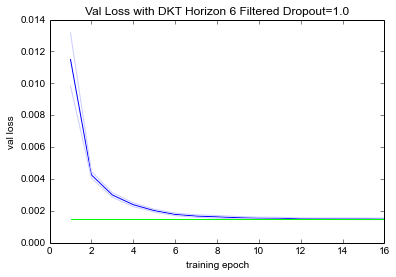

In [66]:
data1 = np.load('experiments/dropoutput2.npz')

vals = data1['vals'][0,:,:]

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

figure()
title('Val Loss with DKT Horizon 6 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

xs = np.arange(vals.shape[1]) + 1.0
ys = np.mean(vals, axis=0)
err = np.std(vals, axis=0)*1.96/np.sqrt(vals.shape[0])
plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')
#ylim(0.001, 0.002)

val_limit = np.mean(ys[-2:])
sig_acc = 0.00001
six.print_('Val limit: {:.4}'.format(val_limit))
six.print_('Val threshold using sig dig {} is {:.4}'.format(sig_acc, val_limit +sig_acc))
plot(xs, np.repeat(val_limit, xs.shape), color='#00ff00')
plot(xs, np.repeat(val_limit + rel_acc*val_limit, xs.shape), color='#00ff00')
# looks like epoch 12 is when val loss has converged within 3 significant digits


Val limit: 0.001756
Val threshold using sig dig 1e-05 is 0.001766


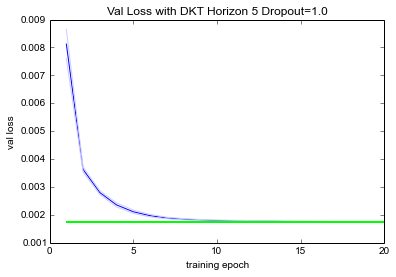

In [77]:
data1 = np.load('experiments/dropoutput3.npz')
data2 = np.load('experiments/earlystopping5.npz')

#vals = data1['vals'][0,:,:]
vals = np.vstack([data1['vals'][0,:,:], data2['vals'][:,:20]])

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

figure()
title('Val Loss with DKT Horizon 5 Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

xs = np.arange(vals.shape[1]) + 1.0
ys = np.mean(vals, axis=0)
err = np.std(vals, axis=0)*1.96/np.sqrt(vals.shape[0])
plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')
#ylim(0.001, 0.002)
#xlim(10,20)

val_limit = np.mean(ys[-2:])
sig_acc = 0.00001
six.print_('Val limit: {:.4}'.format(val_limit))
six.print_('Val threshold using sig dig {} is {:.4}'.format(sig_acc, val_limit +sig_acc))
plot(xs, np.repeat(val_limit, xs.shape), color='#00ff00')
plot(xs, np.repeat(val_limit + rel_acc*val_limit, xs.shape), color='#00ff00')
# looks like epoch 14 is when val loss has converged within 3 significant digits


Val limit: 0.001267
Val threshold using sig dig 1e-05 is 0.001277


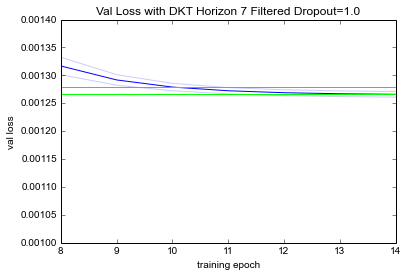

In [83]:
data1 = np.load('experiments/dropoutput4.npz')

vals = data1['vals'][0,:,:]

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

figure()
title('Val Loss with DKT Horizon 7 Filtered Dropout=1.0')
xlabel('training epoch')
ylabel('val loss')

xs = np.arange(vals.shape[1]) + 1.0
ys = np.mean(vals, axis=0)
err = np.std(vals, axis=0)*1.96/np.sqrt(vals.shape[0])
plot(xs, ys, color='#0000ff')
plot(xs, ys+err, color='#ccccff')
plot(xs, ys-err, color='#ccccff')
ylim(0.001, 0.0014)
xlim(8,14)

val_limit = np.mean(ys[-2:])
sig_acc = 0.00001
six.print_('Val limit: {:.4}'.format(val_limit))
six.print_('Val threshold using sig dig {} is {:.4}'.format(sig_acc, val_limit +sig_acc))
plot(xs, np.repeat(val_limit, xs.shape), color='#00ff00')
plot(xs, np.repeat(val_limit + rel_acc*val_limit, xs.shape), color='#00ff00')
# looks like epoch 10 is when val loss has converged within 3 significant digits


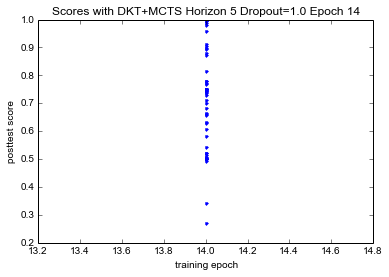

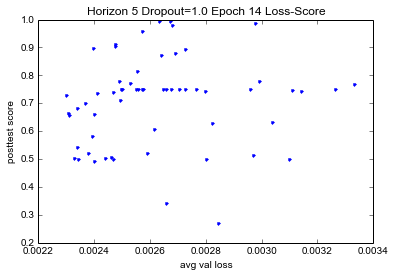

In [40]:
data1 = np.load('experiments/earlystopping8.npz')
data2 = np.load('experiments/earlystopping10.npz')

vals = np.vstack([data1['vals'], data2['vals']])
val_avg = np.mean(vals, axis=1)

scores = np.concatenate([data1['scores'][:,0],data2['scores'][:,0]])

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

#for r in six.moves.range(val_sums.shape[0]):
#    six.print_('{:2d} {:.5f} {:.4f}'.format(r, val_avg[r], scores[r]))

figure()
title('Scores with DKT+MCTS Horizon 5 Dropout=1.0 Epoch 14')
xlabel('training epoch')
ylabel('posttest score')

xs = np.concatenate([data1['eps'],data2['eps']])
ys = scores

plot(xs, ys, '.', color='#0000ff')

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 Loss-Score')
xlabel('avg val loss')
ylabel('posttest score')
xs = val_avg
ys = scores
plot(xs, ys, '.', color='#0000ff')


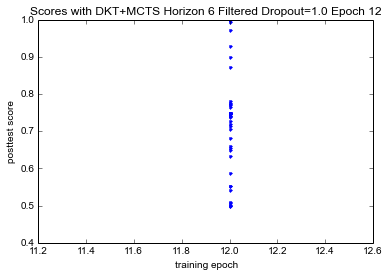

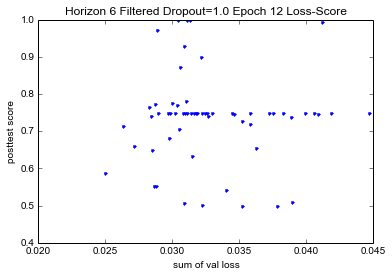

In [45]:
data1 = np.load('experiments/earlystopping9.npz')
data2 = np.load('experiments/earlystopping11.npz')

vals = np.vstack([data1['vals'],data2['vals']])
val_sums = np.sum(vals[:,:], axis=1)
scores = np.concatenate([data1['scores'][:,0],data2['scores'][:,0]])

#for r in six.moves.range(vals.shape[0]):
#    six.print_('{:2d} [{}]'.format(r, ' '.join('{:.4f}'.format(x) for x in vals[r,:])))

#for r in six.moves.range(val_sums.shape[0]):
#    six.print_('{:2d} {:.5f} {:.4f}'.format(r, val_sums[r], scores[r]))

figure()
title('Scores with DKT+MCTS Horizon 6 Filtered Dropout=1.0 Epoch 12')
xlabel('training epoch')
ylabel('posttest score')

xs = np.concatenate([data1['eps'],data2['eps']])
ys = scores

plot(xs, ys, '.', color='#0000ff')

figure()
title('Horizon 6 Filtered Dropout=1.0 Epoch 12 Loss-Score')
xlabel('sum of val loss')
ylabel('posttest score')
xs = val_sums
ys = scores
plot(xs, ys, '.', color='#0000ff')


 0 0.6979 3.5845
 1 0.6380 3.0328
 2 1.0000 3.5176
 3 0.7500 3.1657
 4 0.5208 3.6017
 5 0.9062 3.0751
 6 0.7500 3.0099
 7 0.6849 3.5839
 8 0.7500 3.1730
 9 0.9036 3.4734
10 0.5000 3.0675
11 0.7500 3.3549
12 0.7500 3.3046
13 0.7500 3.2964
14 0.5000 3.5954
15 1.0000 3.3843
16 0.7500 3.3653
17 0.7500 2.9623
18 0.5938 2.9451
19 0.7500 3.2618


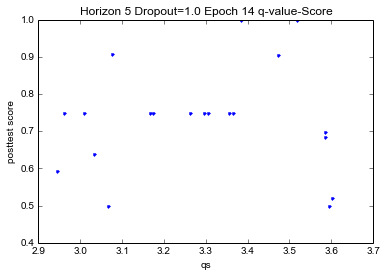

In [9]:
data1 = np.load('experiments/earlystopping12.npz')

vals = data1['vals']
val_sums = np.sum(vals[:,:], axis=1)
scores = data1['scores'][:,0]
qs = data1['qs'][:,0]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d} {:.4f} {:.4f}'.format(r, scores[r], qs[r]))

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 q-value-Score')
xlabel('qs')
ylabel('posttest score')
xs = qs
ys = scores
plot(xs, ys, '.', color='#0000ff')


(3.9, 4.0)

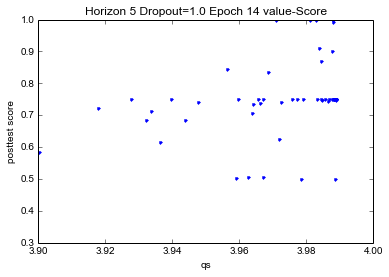

In [10]:
data1 = np.load('experiments/earlystopping14.npz')
data2 = np.load('experiments/earlystopping15.npz')

scores = np.concatenate([data1['scores'][:,0],data2['scores'][:,0]])
qs = np.concatenate([data1['qs'][:,0],data2['qs'][:,0]])

#for r in six.moves.range(scores.shape[0]):
#    six.print_('{:2d} {:.4f} {:.4f}'.format(r, scores[r], qs[r]))

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 value-Score')
xlabel('qs')
ylabel('posttest score')
xs = qs
ys = scores
plot(xs, ys, '.', color='#0000ff')
xlim(3.9,4.0)


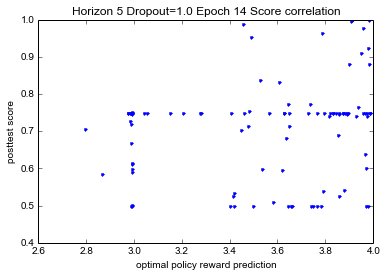

In [15]:
data1 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data2 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

data3 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts1000-trajectories100-real0-runA.npz')
data4 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts1000-trajectories100-real0-runB.npz')

data5 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/policy-rtype1-trajectories100-runA.npz')
data6 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/policy-rtype1-trajectories100-runB.npz')

data7 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runA.npz')
data8 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runB.npz')

trueqvals = np.concatenate([data1['qvals'][:,0],data2['qvals'][:,0]])
scores = np.concatenate([data1['scores'][:,0],data2['scores'][:,0]])

oldrewards = np.concatenate([data5['rewards'][:,0], data6['rewards'][:,0]])
rewards = np.concatenate([data7['rewards'][:,0], data8['rewards'][:,0]])

falseqvals = np.concatenate([data3['qvals'][:,0],data4['qvals'][:,0]])

for r in six.moves.range(scores.shape[0]):
    #six.print_('{:2d}: score {:.3f} true qval {:.4f} false qvals {:.4f} rewards {:.4f}'.format(r, scores[r], trueqvals[r], falseqvals[r], rewards[r]))
    pass

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 Score correlation')
xlabel('optimal policy reward prediction')
ylabel('posttest score')
plot(rewards, scores, '.')
#xlim(3.9,4.0)

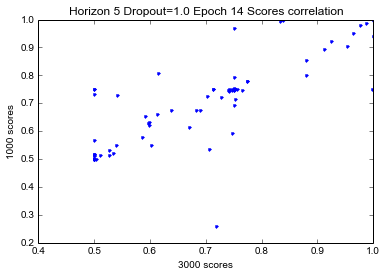

In [9]:
data1 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts1000-trajectories100-real1-runA.npz')
data2 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts1000-trajectories100-real1-runB.npz')

data3 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data4 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

scores1 = np.concatenate([data1['scores'][:,0],data2['scores'][:,0]])
scores2 = np.concatenate([data3['scores'][:,0],data4['scores'][:,0]])

figure()
title('Horizon 5 Dropout=1.0 Epoch 14 Scores correlation')
xlabel('3000 scores')
ylabel('1000 scores')
plot(scores2, scores1, '.')
#xlim(3.9,4.0)

thresh 0.002489 last val 0.002389


(0.0023, 0.0025)

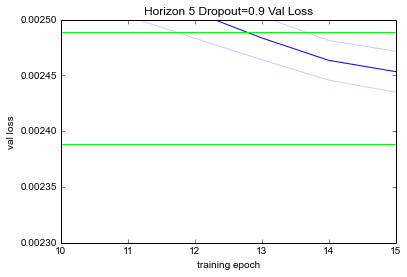

In [47]:
'''
Trying to find a stopping point for horizon 5 dropout 0.9
'''
data1 = np.load('experiments/test2_model_small-dropout9-shuffle0-data-test2-n100000-l5-random.pickle/stats-stopping.npz')

vloss = data1['vloss']

xs = list(six.moves.range(vloss.shape[1]))
ys_mean = np.mean(vloss,axis=0)
ys_err = np.std(vloss,axis=0)/np.sqrt(vloss.shape[0])

last_val = ys_mean[-1]
thresh = last_val + 0.0001
six.print_('thresh {:4f} last val {:4f}'.format(thresh, last_val))

figure()
title('Horizon 5 Dropout=0.9 Val Loss')
plot(xs, ys_mean,color='#0000ff')
plot(xs, ys_mean+ys_err,color='#ccccff')
plot(xs, ys_mean-ys_err,color='#ccccff')
plot([xs[0], xs[-1]], [last_val, last_val], color='#00ff00')
plot([xs[0], xs[-1]], [thresh, thresh], color='#00ff00')
xlabel('training epoch')
ylabel('val loss')
xlim(10,15)
ylim(0.0023,0.0025)
# 2 significant digits epoch index 13

thresh 0.004876 last val 0.004866


(0.0048, 0.005)

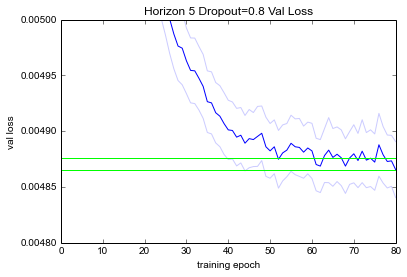

In [5]:
'''
Trying to find a stopping point for horizon 5 dropout 0.8
'''
data1 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-stopping.npz')

vloss = data1['vloss']

xs = list(six.moves.range(vloss.shape[1]))
ys_mean = np.mean(vloss,axis=0)
ys_err = np.std(vloss,axis=0)/np.sqrt(vloss.shape[0])

last_val = ys_mean[-1]
thresh = last_val + 0.00001
six.print_('thresh {:4f} last val {:4f}'.format(thresh, last_val))

figure()
title('Horizon 5 Dropout=0.8 Val Loss')
plot(xs, ys_mean,color='#0000ff')
plot(xs, ys_mean+ys_err,color='#ccccff')
plot(xs, ys_mean-ys_err,color='#ccccff')
plot([xs[0], xs[-1]], [last_val, last_val], color='#00ff00')
plot([xs[0], xs[-1]], [thresh, thresh], color='#00ff00')
xlabel('training epoch')
ylabel('val loss')
#xlim(20,40)
ylim(0.0048,0.0050)
# 2 significant digits epoch index 23
# 3 significant digits looks around 60

 0: score 0.750 initialq 3.43 opt [[1 1 3 3 2 0]]
  step 0 qfunc [ 2.16 3.27 2.27 2.16 ]
  step 1 qfunc [ 2.36 3.37 2.37 2.37 ]
  step 2 qfunc [ 2.43 2.71 2.41 3.49 ]
  step 3 qfunc [ 3.01 2.89 2.89 3.51 ]
  step 4 qfunc [ 3.36 3.40 3.52 2.62 ]
  step 5 qfunc [ 3.54 3.46 3.53 3.13 ]
 1: score 0.750 initialq 3.40 opt [[2 1 1 3 3 0]]
  step 0 qfunc [ 2.26 2.61 3.31 2.29 ]
  step 1 qfunc [ 2.39 3.37 2.33 2.33 ]
  step 2 qfunc [ 2.58 3.40 2.58 2.65 ]
  step 3 qfunc [ 3.12 3.07 2.77 3.44 ]
  step 4 qfunc [ 3.44 3.41 2.76 3.45 ]
  step 5 qfunc [ 3.46 3.44 3.27 3.45 ]
 2: score 0.750 initialq 3.39 opt [[2 1 1 1 3 2]]
  step 0 qfunc [ 2.23 2.49 3.27 2.21 ]
  step 1 qfunc [ 2.35 3.34 2.29 2.41 ]
  step 2 qfunc [ 2.66 3.37 2.54 2.68 ]
  step 3 qfunc [ 3.05 3.42 2.59 3.25 ]
  step 4 qfunc [ 3.06 3.15 2.61 3.45 ]
  step 5 qfunc [ 3.45 3.19 3.46 3.27 ]
 3: score 0.753 initialq 3.37 opt [[1 1 3 2 3 0]]
  step 0 qfunc [ 2.28 3.20 2.38 2.23 ]
  step 1 qfunc [ 2.41 3.30 2.56 2.39 ]
  step 2 qfunc [ 2.4

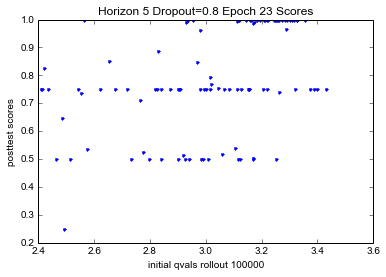

In [13]:
'''
Checking correlations
'''
data11 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runC.npz')
data13 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runD.npz')

data21 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runC.npz')
data23 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories400-real1-runD.npz')

data31 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runA.npz')
data32 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runC.npz')
data33 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories400-real0-runD.npz')

data41 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runA.npz')
data42 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runC.npz')
data43 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runD.npz')

data51 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runC.npz')
data53 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runD.npz')

data61 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runC.npz')
data63 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runD.npz')

vloss = np.concatenate([data11['vloss'],data12['vloss'],data13['vloss']])
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0],data23['scores'][:,0]])
#trueqvals = np.concatenate([data21['qvals'][:,0],data22['qvals'][:,0],data23['qvals'][:,0]])
#falseqvals = np.concatenate([data31['qvals'][:,0],data32['qvals'][:,0],data33['qvals'][:,0]])
rewards = np.concatenate([data41['rewards'][:,0],data42['rewards'][:,0],data43['rewards'][:,0]])
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0],data53['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts'],data63['opts']])
qfuncs = np.vstack([data61['qs'][:,0,:,:],data62['qs'][:,0,:,:],data63['qs'][:,0,:,:]])

sorted_score_ix = np.flip(np.argsort(initialq), 0)
sorted_scores = scores[sorted_score_ix]
sorted_initialq = initialq[sorted_score_ix]
sorted_opts = opts[sorted_score_ix,:]
sorted_qfuncs = qfuncs[sorted_score_ix,:,:]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d}: score {:.3f} initialq {:.2f} opt {}'.format(r, sorted_scores[r], sorted_initialq[r], sorted_opts[r,:]))
    for t in six.moves.range(6):
        six.print_('  step {} qfunc [ {} ]'.format(t, ' '.join(['{:.2f}'.format(q) for q in sorted_qfuncs[r,t,:]])))
    pass

figure()
title('Horizon 5 Dropout=0.8 Epoch 23 Scores')
xlabel('initial qvals rollout 100000')
ylabel('posttest scores')
plot(initialq, scores, '.',color='#0000ff')
#xlim(3.4,3.6)

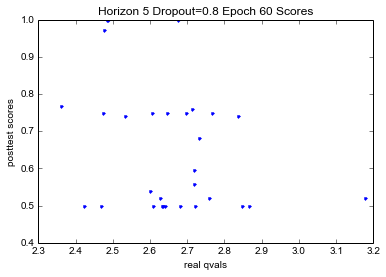

In [11]:
'''
Checking correlations
'''
data1 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runB.npz')
data2 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')
data3 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real0-runB.npz')
data4 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/policies-rtype1-trajectories400-runB.npz')

vloss = data1['vloss']
trueqvals = data2['qvals'][:,0]
falseqvals = data3['qvals'][:,0]
scores = data2['scores'][:,0]
rewards = data4['rewards'][:,0]

figure()
title('Horizon 5 Dropout=0.8 Epoch 60 Scores')
xlabel('real qvals')
ylabel('posttest scores')
plot(rewards, scores, '.')

thresh 0.009242 last val 0.009242


(0.009, 0.01)

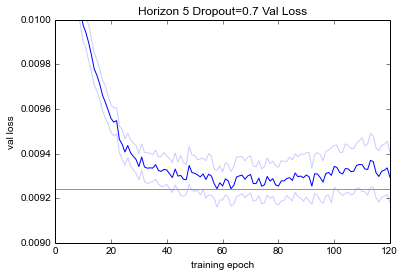

In [5]:
'''
Trying to find a stopping point for horizon 5 dropout 0.7
'''
data1 = np.load('experiments/test2_model_small-dropout7-shuffle0-data-test2-n100000-l5-random.pickle/stats-stopping.npz')

vloss = data1['vloss']

xs = list(six.moves.range(vloss.shape[1]))
ys_mean = np.mean(vloss,axis=0)
ys_err = np.std(vloss,axis=0)/np.sqrt(vloss.shape[0])

last_val = np.min(ys_mean)
thresh = last_val
six.print_('thresh {:4f} last val {:4f}'.format(thresh, last_val))

figure()
title('Horizon 5 Dropout=0.7 Val Loss')
plot(xs, ys_mean,color='#0000ff')
plot(xs, ys_mean+ys_err,color='#ccccff')
plot(xs, ys_mean-ys_err,color='#ccccff')
plot([xs[0], xs[-1]], [last_val, last_val], color='#00ff00')
plot([xs[0], xs[-1]], [thresh, thresh], color='#00ff00')
xlabel('training epoch')
ylabel('val loss')
#xlim(20,40)
ylim(0.009,0.010)
# looks like there's a low point at 65

In [5]:
'''
Checking correlations for no dropout
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runA.npz')
data12 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/stats-runB.npz')

data21 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runA.npz')
data22 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

data51 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runA.npz')
data52 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runB.npz')

data61 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runA.npz')
data62 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts10000-runB.npz')

vloss = np.concatenate([data11['vloss'],data12['vloss']])
scores = np.concatenate([data21['scores'][:,0],data22['scores'][:,0]])
initialq = np.concatenate([data51['qvals'][:,0],data52['qvals'][:,0]])
opts = np.vstack([data61['opts'],data62['opts']])
qfuncs = np.vstack([data61['qs'][:,0,:,:],data62['qs'][:,0,:,:]])

sorted_score_ix = np.flip(np.argsort(initialq), 0)
sorted_scores = scores[sorted_score_ix]
sorted_initialq = initialq[sorted_score_ix]
sorted_opts = opts[sorted_score_ix,:]
sorted_qfuncs = qfuncs[sorted_score_ix,:,:]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d}: score {:.3f} initialq {:.2f} opt {}'.format(r, sorted_scores[r], sorted_initialq[r], sorted_opts[r,:]))
    for t in six.moves.range(6):
        six.print_('  step {} qfunc [ {} ]'.format(t, ' '.join(['{:.2f}'.format(q) for q in sorted_qfuncs[r,t,:]])))
    pass


 0: score 0.500 initialq 3.97 opt [[1 2 1 3 0 0]]
  step 0 qfunc [ 2.47 3.91 3.15 2.86 ]
  step 1 qfunc [ 3.12 3.50 3.95 2.97 ]
  step 2 qfunc [ 3.23 3.96 3.22 3.07 ]
  step 3 qfunc [ 3.94 3.94 3.94 3.99 ]
  step 4 qfunc [ 3.99 3.99 3.99 3.99 ]
  step 5 qfunc [ 3.99 3.99 3.99 3.99 ]
 1: score 0.755 initialq 3.96 opt [[2 1 3 1 3 3]]
  step 0 qfunc [ 2.74 3.14 3.92 2.54 ]
  step 1 qfunc [ 2.72 3.94 2.77 2.57 ]
  step 2 qfunc [ 3.19 3.95 3.07 3.95 ]
  step 3 qfunc [ 3.11 3.97 2.92 2.96 ]
  step 4 qfunc [ 3.97 3.96 3.30 3.98 ]
  step 5 qfunc [ 3.98 3.98 3.99 3.99 ]
 2: score 0.750 initialq 3.96 opt [[1 2 3 1 3 2]]
  step 0 qfunc [ 2.67 3.89 2.96 2.83 ]
  step 1 qfunc [ 3.16 3.35 3.94 3.09 ]
  step 2 qfunc [ 3.10 3.83 2.99 3.96 ]
  step 3 qfunc [ 2.91 3.97 2.99 2.95 ]
  step 4 qfunc [ 3.97 3.88 3.00 3.98 ]
  step 5 qfunc [ 3.99 3.97 3.99 3.97 ]
 3: score 0.953 initialq 3.96 opt [[1 2 1 3 2 3]]
  step 0 qfunc [ 2.62 3.89 2.94 2.72 ]
  step 1 qfunc [ 2.91 3.34 3.93 2.80 ]
  step 2 qfunc [ 3.2

In [2]:
'''
Checking correlations
'''
data11 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/stats-runB.npz')

data21 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')

data51 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/initialq-rtype1-rollouts100000-runB.npz')

data61 = np.load('experiments/test2_model_small-dropout8-shuffle0-data-test2-n100000-l5-random.pickle/optpolicy-rtype1-rollouts20000-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
initialq = data51['qvals'][:,0]
opts = data61['opts']
qfuncs = data61['qs'][:,0,:,:]

sorted_score_ix = np.flip(np.argsort(initialq), 0)
sorted_scores = scores[sorted_score_ix]
sorted_initialq = initialq[sorted_score_ix]
sorted_opts = opts[sorted_score_ix,:]
sorted_qfuncs = qfuncs[sorted_score_ix,:,:]

for r in six.moves.range(scores.shape[0]):
    six.print_('{:2d}: score {:.3f} initialq {:.2f} opt {}'.format(r, sorted_scores[r], sorted_initialq[r], sorted_opts[r,:]))
    for t in six.moves.range(6):
        six.print_('  step {} qfunc [ {} ]'.format(t, ' '.join(['{:.2f}'.format(q) for q in sorted_qfuncs[r,t,:]])))
    pass

 0: score 0.750 initialq 3.46 opt [[2 1 1 3 3 0]]
  step 0 qfunc [ 2.24 2.53 3.41 2.27 ]
  step 1 qfunc [ 2.33 3.44 2.34 2.38 ]
  step 2 qfunc [ 2.54 3.46 2.42 2.52 ]
  step 3 qfunc [ 2.79 3.15 2.44 3.50 ]
  step 4 qfunc [ 3.51 3.45 2.45 3.51 ]
  step 5 qfunc [ 3.52 3.31 3.52 3.51 ]
 1: score 0.500 initialq 3.45 opt [[1 1 3 2 1 0]]
  step 0 qfunc [ 2.25 3.39 2.33 2.24 ]
  step 1 qfunc [ 2.46 3.43 2.62 2.50 ]
  step 2 qfunc [ 2.69 2.82 2.69 3.48 ]
  step 3 qfunc [ 3.38 3.28 3.50 3.47 ]
  step 4 qfunc [ 3.51 3.51 3.49 3.50 ]
  step 5 qfunc [ 3.52 3.52 3.52 3.21 ]
 2: score 0.539 initialq 3.45 opt [[1 1 3 2 1 0]]
  step 0 qfunc [ 2.20 3.38 2.41 2.19 ]
  step 1 qfunc [ 2.27 3.42 2.61 2.40 ]
  step 2 qfunc [ 2.57 2.69 2.54 3.47 ]
  step 3 qfunc [ 3.27 3.35 3.49 3.23 ]
  step 4 qfunc [ 3.48 3.50 3.00 3.46 ]
  step 5 qfunc [ 3.52 3.45 3.51 3.29 ]
 3: score 0.500 initialq 3.44 opt [[1 1 3 2 0 0]]
  step 0 qfunc [ 2.24 3.37 2.29 2.23 ]
  step 1 qfunc [ 2.40 3.42 2.48 2.39 ]
  step 2 qfunc [ 2.3